In [1]:
#source: https://www.kaggle.com/itsmesunil/bank-loan-modelling

In [99]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
data = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name = 'Data',na_values='NA')

# first and last three observations of the Bank Loan Dataset

In [100]:
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [101]:
data.tail(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#shape of the data

In [4]:
data.shape

(5000, 14)

In [102]:
#five number summary for the numerical values
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Checking the null values:

In [6]:
data.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Checking the Duplicate values

In [7]:
data.duplicated().sum()

0

Name of the variables: 

In [8]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# Changing the data type

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [120]:
data.astype({'Personal Loan': 'boolean',
           'Securities Account': 'boolean',
           'CD Account': 'boolean',
           'Online': 'boolean',
           'CreditCard': 'boolean' 
          }).dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan         boolean
Securities Account    boolean
CD Account            boolean
Online                boolean
CreditCard            boolean
dtype: object

finding the unique values of each of the variable

In [10]:
data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize = (16,12),alpha = 0.3)

# Pandas Profiling 

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title = 'Pandas Profiling Report for Bank Loan',explorative = True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file('Bank Loan.html')

we have some negative values in the Experience column {-1,-2,-3}. <br>
for the study purpose i just eliminate those values and then create a new dataframe denoted [df]

In [124]:
a = data["Experience"] >= 0
a.sum()

4948

In [125]:
df = data.loc[a]
df.shape

(4948, 14)

# detecting outliers for continuous variable {Income,Mortgage and CCAvg}

In [182]:
df["Income"].mean()

70.01013085690164

In [183]:
df["Income"].std()

42.988506826502345

In [184]:
upper_limit = df["Income"].mean() + 3 * df["Income"].std()
lower_limit = df["Income"].mean() - 3 * df["Income"].std()
print(upper_limit,lower_limit)

198.97565133640867 -58.955389622605395


In [185]:
outliers_income = df[(df.Income > upper_limit) | (df.Income < lower_limit)]
outliers_income

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
526,26,2,205,93106,1,6.333333,1,271,0,0,0,0,1
677,46,21,204,92780,2,2.800000,1,0,0,0,0,1,0
1711,27,3,201,95819,1,6.333333,1,158,0,0,0,1,0
1901,43,19,201,94305,2,6.666667,1,0,0,1,0,1,0
2278,30,4,204,91107,2,4.500000,1,0,0,0,0,1,0
3758,47,23,199,94720,2,6.666667,1,0,0,0,0,1,0
4606,44,20,199,94607,2,6.666667,1,0,0,0,0,1,0
4659,28,4,199,92121,1,6.333333,1,0,0,0,0,0,0
4895,45,20,201,92120,2,2.800000,1,0,0,0,0,1,1


new dataframe without the outliers we have in Income variable

In [186]:
df = df[df.Income < upper_limit]
df.shape

(4729, 13)

In [131]:
df["Mortgage"].mean()

56.65729882733522

In [132]:
df["Mortgage"].std()

101.84310394094562

In [133]:
upper_limit = df["Mortgage"].mean() + 3 * df["Mortgage"].std()
lower_limit = df["Mortgage"].mean() - 3 * df["Mortgage"].std()
print(upper_limit,lower_limit)

362.1866106501721 -248.87201299550165


In [134]:
df = df[df.Mortgage < upper_limit]
df.shape

(4841, 14)

In [135]:
df["CCAvg"].mean()

1.8957136955174598

In [136]:
df["CCAvg"].std()

1.7064431660580213

In [137]:
upper_limit = df["CCAvg"].mean() + 3 * df["CCAvg"].std()
lower_limit = df["CCAvg"].mean() - 3 * df["CCAvg"].std()
print(upper_limit,lower_limit)

7.015043193691524 -3.2236158026566044


In [138]:
df = df[df.CCAvg < upper_limit]
df.shape

(4738, 14)

# Relational Analysis: CORRELATION and HEATMAP 

In [139]:
# dropping unnecessary column
df = df.drop(['ID'],axis = 1)

In [140]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994112,-0.057079,-0.026694,-0.039869,-0.047158,0.045420,-0.015250,-0.019474,0.002580,0.001419,0.014475,0.008360
Experience,0.994112,1.000000,-0.047902,-0.025825,-0.045933,-0.046030,0.017867,-0.014006,-0.017277,0.001197,0.003740,0.014083,0.009860
Income,-0.057079,-0.047902,1.000000,-0.015999,-0.144108,0.603637,-0.169985,0.071560,0.503514,0.003717,0.161651,0.015579,0.003667
ZIP Code,-0.026694,-0.025825,-0.015999,1.000000,0.010266,-0.007722,-0.018575,0.010392,-0.002031,0.001556,0.015280,0.021227,0.004250
Family,-0.039869,-0.045933,-0.144108,0.010266,1.000000,-0.084318,0.046244,-0.005160,0.048167,0.021507,0.008584,0.008967,0.008351
CCAvg,-0.047158,-0.046030,0.603637,-0.007722,-0.084318,1.000000,-0.107720,0.028527,0.380993,0.023459,0.138728,0.001130,-0.005666
Education,0.045420,0.017867,-0.169985,-0.018575,0.046244,-0.107720,1.000000,-0.007785,0.120259,-0.008970,0.002119,-0.014538,-0.019861
Mortgage,-0.015250,-0.014006,0.071560,0.010392,-0.005160,0.028527,-0.007785,1.000000,0.048044,-0.004573,0.054228,-0.012324,0.003588
Personal Loan,-0.019474,-0.017277,0.503514,-0.002031,0.048167,0.380993,0.120259,0.048044,1.000000,0.025335,0.299940,0.007787,-0.000574
Securities Account,0.002580,0.001197,0.003717,0.001556,0.021507,0.023459,-0.008970,-0.004573,0.025335,1.000000,0.327097,0.015941,-0.015033


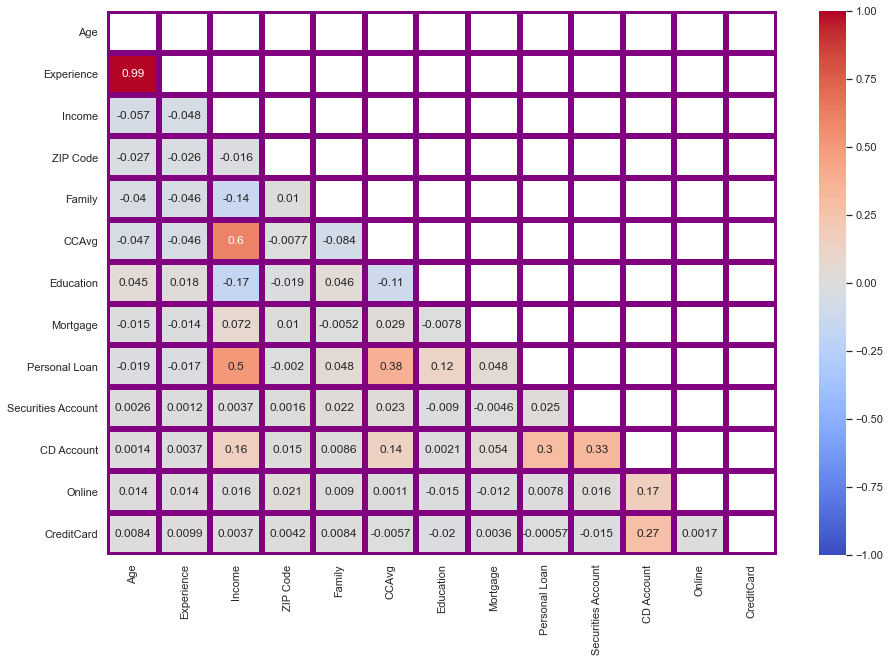

In [179]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=5, linecolor='purple',mask= mask)
plt.show()

# EDA (Exploratory Data Analysis)

# ============================================================

# UNIVARIATE ANALYSIS: Categorical Variable {PERSONAL LOAN}

In [160]:
# frequency table: Personal Loan

barchart_PL = df['Personal Loan'].value_counts()
barchart_PL

0    4331
1     407
Name: Personal Loan, dtype: int64

Text(0.5, 1.0, "Pie Chart for the Customer's Personal Loan")

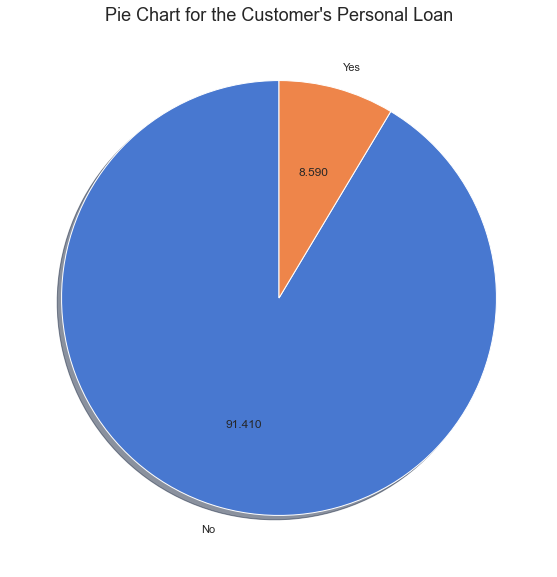

In [171]:
# pie chart 

plt.figure(figsize= (15,10))
plt.pie(barchart_PL,startangle= 90,autopct= '%.3f',
            labels = ['No','Yes'],shadow= True)
plt.title("Pie Chart for the Customer's Personal Loan",fontsize=18)

Text(0, 0.5, '# of people')

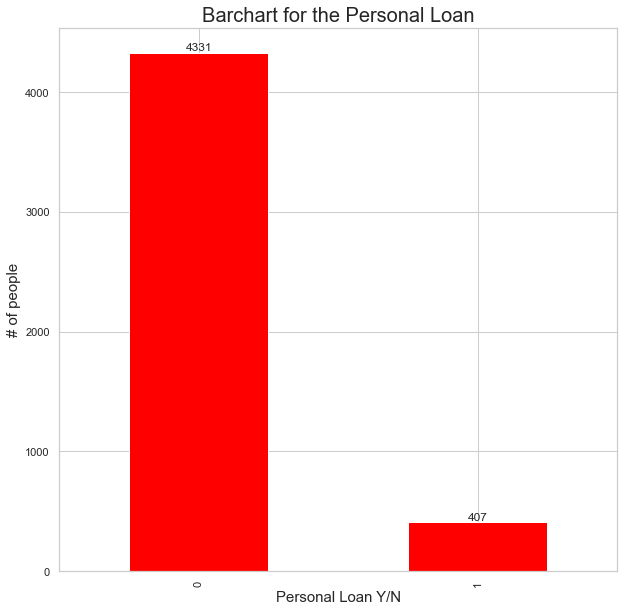

In [190]:
plt.figure(figsize= (10,10))
plt.text(0,barchart_PL[0],'4331',ha = 'center',va = 'bottom')
plt.text(1,barchart_PL[1],'407',ha = 'center',va = 'bottom')
df['Personal Loan'].value_counts().plot.bar(color = 'red')
plt.title("Barchart for the Personal Loan",fontsize=20)
plt.xlabel('Personal Loan Y/N', fontsize=15)
plt.ylabel('# of people', fontsize=15)

# UNIVARIATE ANALYSIS:  Continuous Variable {Income}

In [187]:
#showing first 4 observations of Income column
df.Income.sample(4)

4955     39
4625    102
2070     95
1636    100
Name: Income, dtype: int64

In [188]:
# five number summary
df.Income.describe()

count    4729.000000
mean       69.759992
std        42.644739
min         8.000000
25%        38.000000
50%        62.000000
75%        91.000000
max       198.000000
Name: Income, dtype: float64

Text(0, 0.5, '# of people')

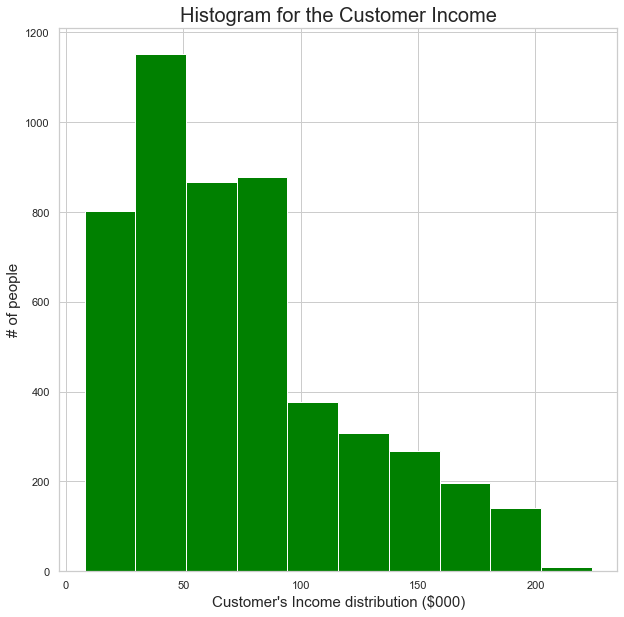

In [200]:
plt.figure(figsize= (10,10))
data['Income'].hist(bins = 10,color = 'green')
plt.title("Histogram for the Customer Income",fontsize=20)
plt.xlabel("Customer's Income distribution ($000)", fontsize=15)
plt.ylabel('# of people', fontsize=15)

<AxesSubplot:title={'center':"Density Plot for the Customer's Income"}, xlabel='Income', ylabel='Density'>

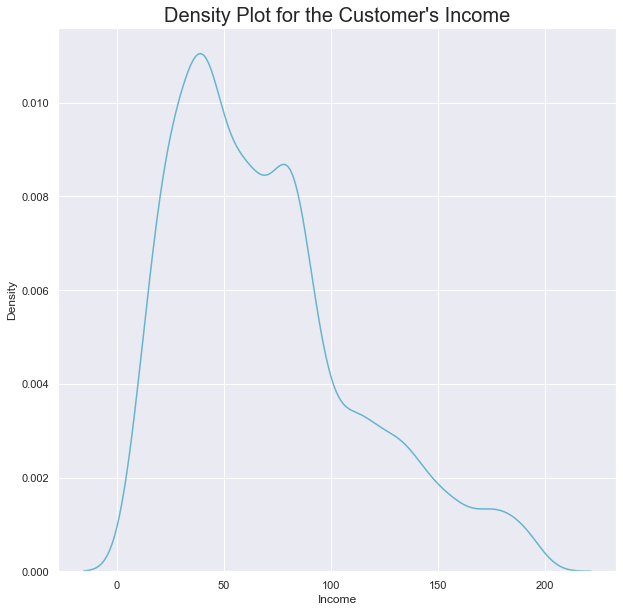

In [215]:
plt.figure(figsize= (10,10))
plt.title("Density Plot for the Customer's Income",fontsize=20)
sns.kdeplot(data=df, x="Income",color="c")

Text(0.5, 1.0, 'Distribution plot for the Customer Income')

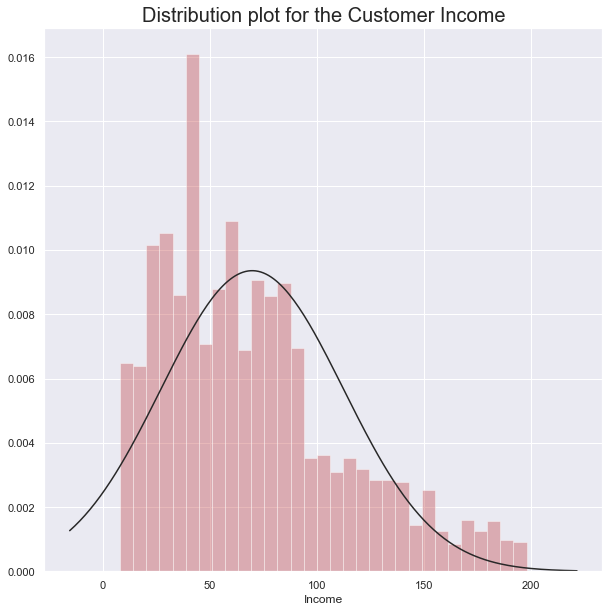

In [235]:
plt.figure(figsize= (10,10))
from scipy.stats import norm
sns.distplot(df.Income, fit=norm, kde=False,color="r")
plt.title("Distribution plot for the Customer Income",fontsize=20)

Text(0.5, 1.0, 'Boxplot  for the Customer Income')

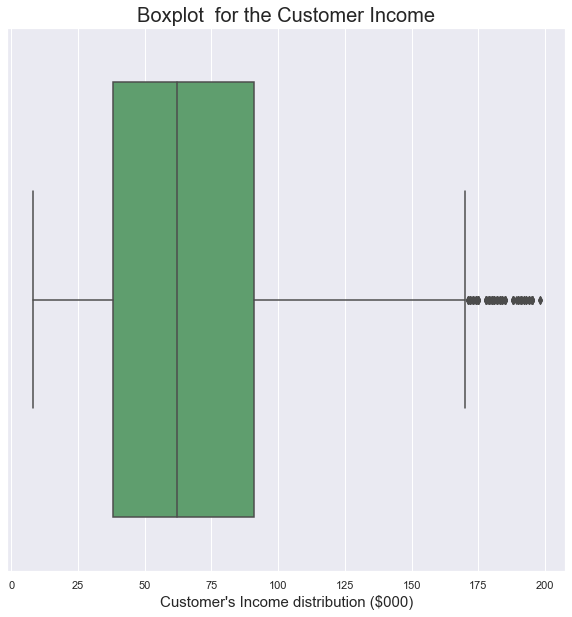

In [236]:
plt.figure(figsize= (10,10))
sns.boxplot(x=df["Income"],color = 'g')
plt.xlabel("Customer's Income distribution ($000)", fontsize=15)
plt.title("Boxplot  for the Customer Income",fontsize=20)

# BI-VARIATE ANALYSIS: Continuous vs Continuous 

<Figure size 720x720 with 0 Axes>

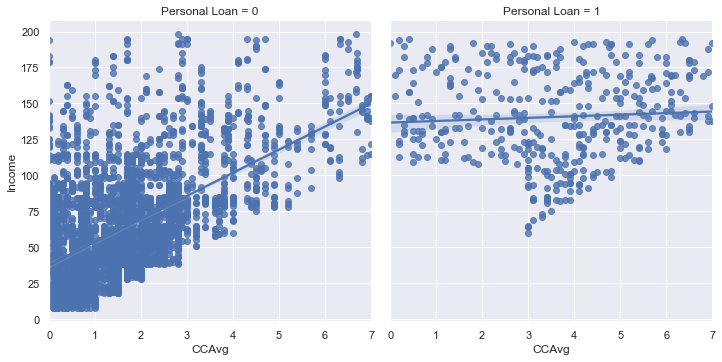

In [240]:
plt.figure(figsize= (10,10))
sns.lmplot(x="CCAvg", y="Income", col="Personal Loan", data=df)


Text(0.5, 1.0, 'Linear relational plot between Customer Experience and Age')

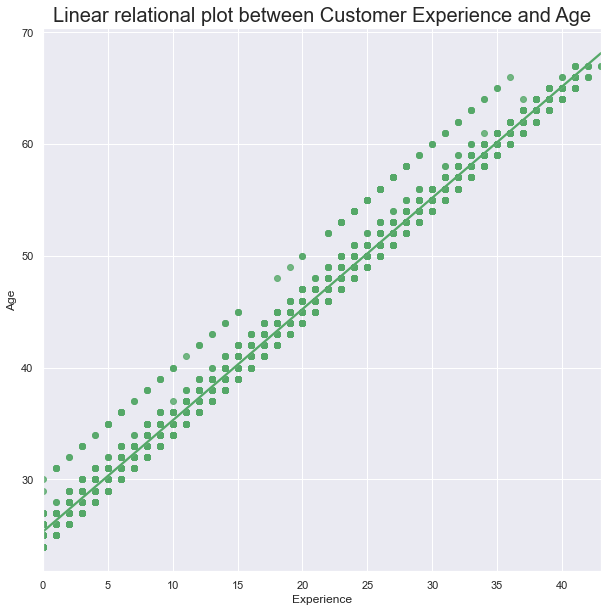

In [244]:
plt.figure(figsize= (10,10))
sns.regplot(x="Experience", y="Age", data=df,color="g")
plt.title("Linear relational plot between Customer Experience and Age",fontsize=20)

Text(0.5, 1.0, 'Scatter plot between customer CCAvg and Income/ Personal Loan')

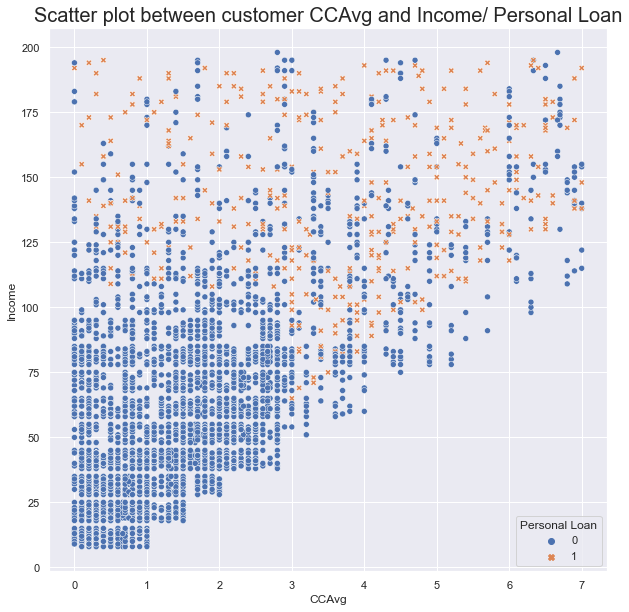

In [243]:
plt.figure(figsize= (10,10))
sns.scatterplot(data=df, x="CCAvg", y="Income", hue="Personal Loan", style="Personal Loan")
plt.title("Scatter plot between customer CCAvg and Income/ Personal Loan",fontsize=20)


# BI-VARIATE ANALYSIS: Continuous vs Categorical 

Text(0.5, 1.0, 'Barchart for the Customer Personal Loan and CCAvg')

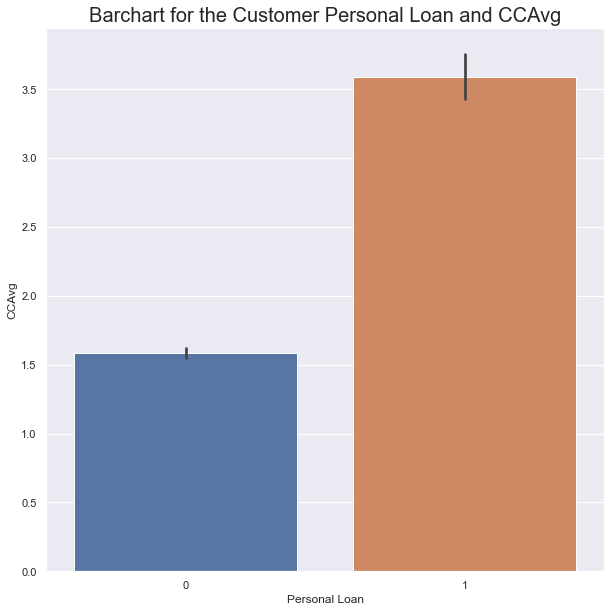

In [248]:
plt.figure(figsize= (10,10))
sns.barplot(x="Personal Loan", y="CCAvg", data=df)
plt.title("Barchart for the Customer Personal Loan and CCAvg",fontsize=20)

Text(0.5, 1.0, 'Relationship between the family members and Mortgage/Personal Loan')

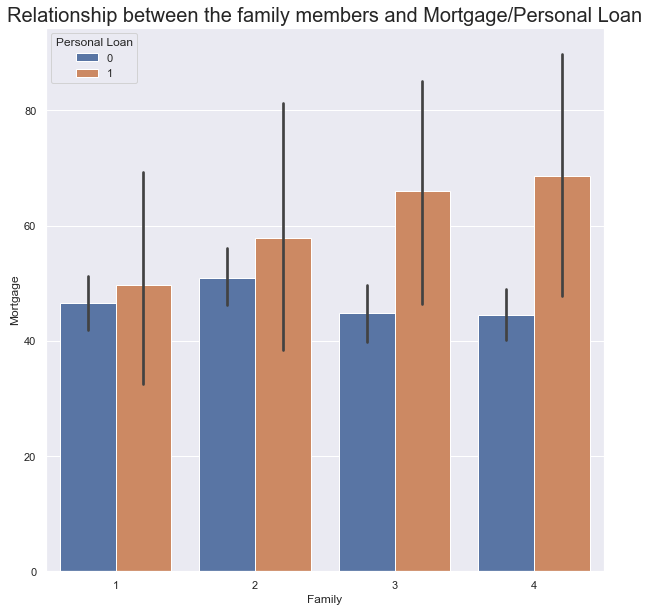

In [257]:
plt.figure(figsize= (10,10))
sns.barplot(x="Family", y="Mortgage", hue="Personal Loan", data=df)
plt.title("Relationship between the family members and Mortgage/Personal Loan",fontsize=20)

Text(0.5, 1.0, 'Relationship between the Credit Card holder and Customer Age/Personal Loan')

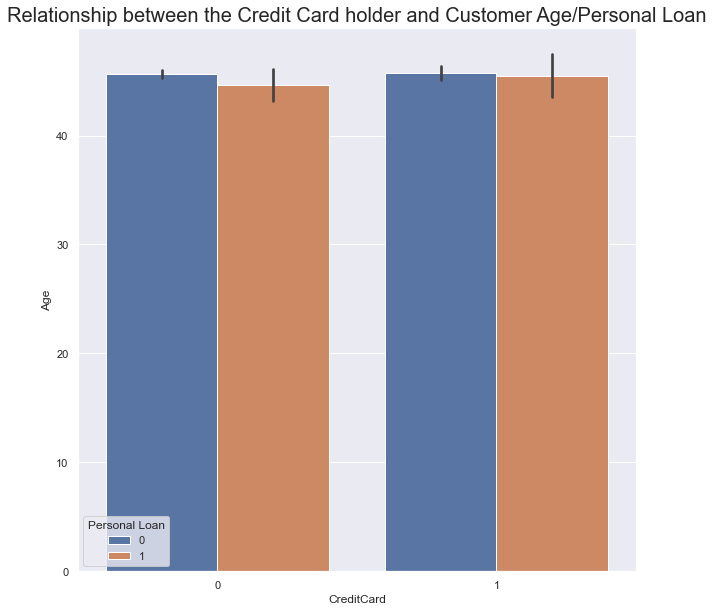

In [259]:
plt.figure(figsize= (10,10))
sns.barplot(x="CreditCard", y="Age", hue="Personal Loan", data=df)
plt.title("Relationship between the Credit Card holder and Customer Age/Personal Loan",fontsize=20)

<AxesSubplot:xlabel='Personal Loan', ylabel='Age'>

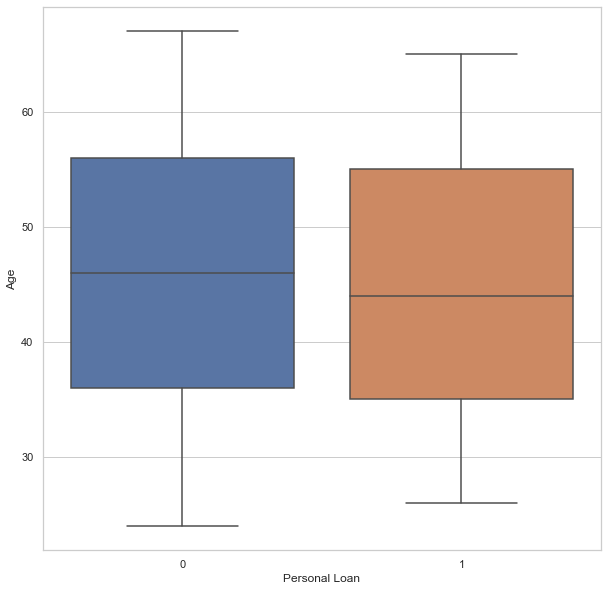

In [416]:
plt.figure(figsize= (10,10))
sns.boxplot(x = 'Personal Loan', y = 'Age', data = df)

Text(0.5, 1.0, 'Association between the CCAvg and Income')

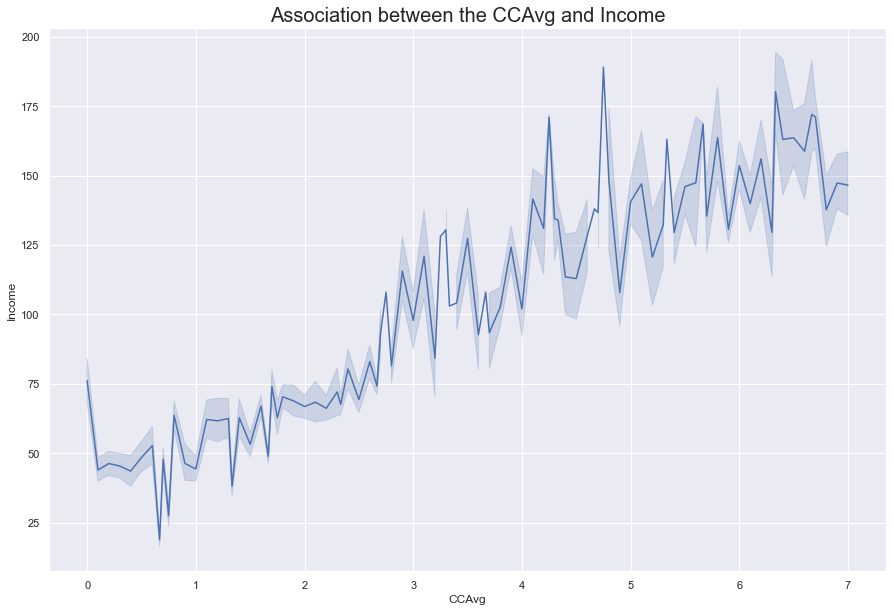

In [269]:
plt.figure(figsize= (15,10))
#sns.lineplot(data=df, x="Family", y="Income")
sns.lineplot(data=df, x="CCAvg", y="Income")
plt.title("Association between the CCAvg and Income",fontsize=20)

# BI-VARIATE ANALYSIS: Categorical vs Categorical 

In [274]:
from scipy.stats import chi2_contingency

In [298]:
#individual percentage of each category
contigency_table = pd.crosstab(df['Personal Loan'],df['Family'],normalize= "index")*100
contigency_table

Family,1,2,3,4
Personal Loan,,,,
0,30.148080,25.127256,20.013882,24.710782
1,23.341523,21.867322,27.272727,27.518428


In [300]:
# frequency table for customer's Personal Loan acceptance rate with respect to their Education level and CD Account

contigency_table = pd.crosstab(df['Personal Loan'],[df['Education'],df["CD Account"]],margins= True)
contigency_table

Education         1          2         3       All
CD Account        0    1     0   1     0   1      
Personal Loan                                     
0              1764   81  1170  32  1232  43  4322
1                51   28   109  48   131  40   407
All            1815  109  1279  80  1363  83  4729

In [296]:
#contigency_table = pd.crosstab(df['Personal Loan'],df['Securities Account']) >> no correlation
#contigency_table = pd.crosstab(df['Personal Loan'],df['CD Account'])
#contigency_table = pd.crosstab(df['Personal Loan'],df['Online']) >> no correlation
contigency_table = pd.crosstab(df['Personal Loan'],df['CreditCard'],margins= True) # >> no correlation
contigency_table

CreditCard,0,1,All
Personal Loan,,,
0,3043,1279,4322
1,287,120,407
All,3330,1399,4729


In [289]:
chi_2, p_val, dof, exp_val = chi2_contingency(contigency_table)

print(chi_2.round(2),'\n',p_val,'\n',dof,'\n',exp_val)

0.0 
 0.991346268852785 
 1 
 [[3043.40452527 1278.59547473]
 [ 286.59547473  120.40452527]]


In [290]:
sig_lev = 0.05
if p_val < sig_lev:
    print("There is a correlation between the two variables at significance level {}".format(sig_lev),' or 95% Confidence Interval')
else:
    print("There is no correlation between the two variables")

There is no correlation between the two variables


![](cat_vs_cat.jpg)


# Feature Engineering: Dropping columns

In [309]:
df_new = df.drop(['Securities Account','Online','CreditCard'],axis = 1,inplace= True)

In [308]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,25,1,49,91107,4,1.6,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0


In [312]:
df.groupby(['ZIP Code'])['Personal Loan'].count()

ZIP Code
9307     1
90005    5
90007    5
90009    8
90011    3
        ..
96091    4
96094    2
96145    1
96150    4
96651    6
Name: Personal Loan, Length: 464, dtype: int64

In [313]:
df.groupby(['ZIP Code'])['Personal Loan'].mean()

ZIP Code
9307     0.0
90005    0.0
90007    0.0
90009    0.0
90011    0.0
        ... 
96091    0.0
96094    0.0
96145    0.0
96150    0.0
96651    0.0
Name: Personal Loan, Length: 464, dtype: float64

In [318]:
Mean_encoded_zip = df.groupby(['ZIP Code'])['Personal Loan'].mean().to_dict()
df['ZIP Code'] =  df['ZIP Code'].map(Mean_encoded_zip)
df.sample(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
3319,60,35,153,0.125000,3,2.0,3,0,1,0
2320,46,22,84,0.000000,4,2.0,3,0,0,0
942,55,29,30,0.019608,4,0.7,2,0,0,0


# standardize the dataset

In [336]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [321]:
#traning dataset 

X = df.drop(['Personal Loan',],axis = 1)
X.sample(3)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,CD Account
619,57,27,73,0.039216,1,3.0,3,0,0
3114,29,4,55,0.000000,4,2.0,2,0,0
3886,67,43,79,0.035714,4,1.7,2,215,1


In [324]:
y = df["Personal Loan"]
y.sample(3)

998     0
4087    1
1634    0
Name: Personal Loan, dtype: int64

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 5)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('The shape of X_train: ',X_train.shape,"\n"
      'The shape of X_test: ',X_test.shape, "\n"
      'The shape of y_train: ',y_train.shape, "\n"
      'The shape of y_test: ',y_test.shape)

The shape of X_train:  (3310, 9) 
The shape of X_test:  (1419, 9) 
The shape of y_train:  (3310,) 
The shape of y_test:  (1419,)


# Modeling

# ============================================================

#                                                    Logistic Regression

In [328]:
#Importing libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='saga')
#logistic = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1)
logistic.fit(X_train, y_train)

LogisticRegression(solver='saga')

In [420]:
#score the model
score = logistic.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the Logistic Regression model is: ',percentage.round(2),"%")

The accuracy of the Logistic Regression model is:  94.43 %


In [418]:
y_pred = logistic.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [425]:
from sklearn.metrics import roc_auc_score
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Logistic Regression Model is: ",R_A_score, "%")

The ROC and AUC score for Logistic Regression Model is:  79.419 %


In [331]:
from sklearn.model_selection import cross_val_score
logisticCross = LogisticRegression(solver='saga',max_iter=100)
print(cross_val_score(logisticCross, X, y, cv = 4, scoring= 'accuracy'))

[0.93575655 0.92470389 0.91708968 0.91539763]


In [334]:
print('The accuracy of the LogisticRegression Cross Validation: ',
      cross_val_score(logisticCross,X,y,cv = 5,scoring= 'accuracy').mean().round(3) *100,"%")

The accuracy of the LogisticRegression Cross Validation:  92.4 %


In [351]:
print('The shape of y_test: ',y_test.shape)

The shape of y_test:  (1419,)


In [337]:
logistic_predictions = logistic.predict(X_test)
cm = confusion_matrix(y_test,logistic_predictions)
print('Confusion Matrix: LogisticRegression\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: LogisticRegression
 [[1255   24]
 [  55   85]]
The diagonal elements are:  [1255   85]
Number of correct predictions:  1340


<AxesSubplot:>

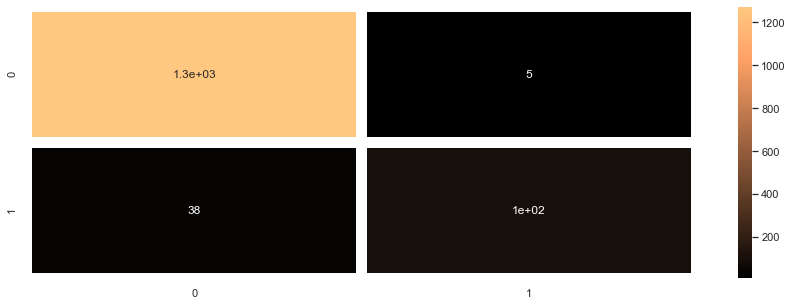

In [415]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="copper" ,linewidths=10, linecolor='white')

In [344]:
logistic_predictions = logistic.predict(X_test)
pd.DataFrame(classification_report(y_test,logistic_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.958015,0.981235,0.969486,1279.000000
1,0.779817,0.607143,0.682731,140.000000
accuracy,0.944327,0.944327,0.944327,0.944327
macro avg,0.868916,0.794189,0.826109,1419.000000
weighted avg,0.940434,0.944327,0.941195,1419.000000


#                                             KNN ( K Nearest Neighbour)

In [427]:
from sklearn import datasets, neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=20,leaf_size=15)

In [428]:
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=15, n_neighbors=20)

In [429]:
score = knn.score(X_test,y_test)
print('KNN score: %.2f' % score)
percentage = score * 100
print('The accuracy of the KNN model is: ',percentage.round(2),"%")

KNN score: 0.95
The accuracy of the KNN model is:  95.14 %


In [430]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [431]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for K Nearest Neighbour Model is: ",R_A_score, "%")

The ROC and AUC score for K Nearest Neighbour Model is:  77.265 %


In [369]:
from sklearn.model_selection import cross_val_score
knnCross = neighbors.KNeighborsClassifier(n_neighbors=20,leaf_size=20, p=1)
print(cross_val_score(knnCross, X, y, cv = 5, scoring= 'accuracy'))

[0.93234672 0.93023256 0.93023256 0.92494715 0.92063492]


In [370]:
print('The accuracy of the LogisticRegression Cross Validation: ',
      cross_val_score(knnCross,X,y,cv = 5,scoring= 'accuracy').mean().round(3) *100,"%")

The accuracy of the LogisticRegression Cross Validation:  92.80000000000001 %


In [371]:
#for no.of neighbors from 1 - 5, graph the k-fold scores
scores = []
for i in range(1,6,1):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=5).mean())

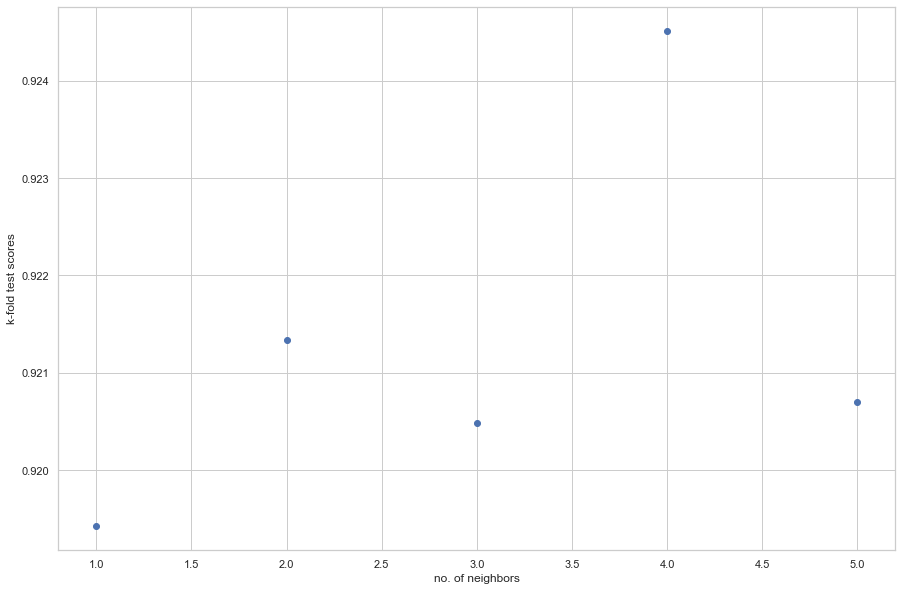

In [372]:
plt.figure(figsize= (15,10))
sns.set_theme(style="whitegrid")
plt.scatter(range(1,6,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

In [432]:
knn_predictions = knn.predict(X_test)

In [433]:
knn_predictions = knn.predict(X_test)
cm = confusion_matrix(y_test,knn_predictions)
print('Confusion Matrix: KNN\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: KNN
 [[1273    6]
 [  63   77]]
The diagonal elements are:  [1273   77]
Number of correct predictions:  1350


In [434]:
pd.DataFrame(classification_report(y_test,knn_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.952844,0.995309,0.973614,1279.000000
1,0.927711,0.550000,0.690583,140.000000
accuracy,0.951374,0.951374,0.951374,0.951374
macro avg,0.940278,0.772654,0.832098,1419.000000
weighted avg,0.950365,0.951374,0.945690,1419.000000


# Random Forest 

In [435]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
r_Forest=RandomForestClassifier(n_estimators=100,random_state = 200,bootstrap = False,min_impurity_decrease = 0.0001)              #Create a Gaussian Classifier
r_Forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, min_impurity_decrease=0.0001,
                       random_state=200)

In [436]:
score = r_Forest.score(X_test,y_test)
print('RForest score: %.2f' % score)
percentage = score * 100
print('The accuracy of the Random Forest model is: ',percentage.round(2),"%")

RForest score: 0.98
The accuracy of the Random Forest model is:  98.31 %


In [437]:
y_pred = r_Forest.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [438]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Random Forest Model is: ",R_A_score, "%")

The ROC and AUC score for Random Forest Model is:  92.383 %


In [380]:
RForest_Cross = RandomForestClassifier(n_estimators=100,criterion='entropy',bootstrap = False)
print(cross_val_score(RForest_Cross, X, y, cv = 5, scoring= 'accuracy'))

[0.98625793 0.99154334 0.98625793 0.99260042 0.98412698]


In [382]:
print('The accuracy of the Random Forest Cross Validation: ',
      cross_val_score(RForest_Cross,X,y,cv = 5,scoring= 'accuracy').mean().round(3) *100,"%")

The accuracy of the Random Forest Cross Validation:  98.8 %


In [385]:
RForest_predictions = r_Forest.predict(X_test)
cm = confusion_matrix(y_test,RForest_predictions)
print('Confusion Matrix: Random Forest\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: Random Forest
 [[1276    3]
 [  21  119]]
The diagonal elements are:  [1276  119]
Number of correct predictions:  1395


<AxesSubplot:>

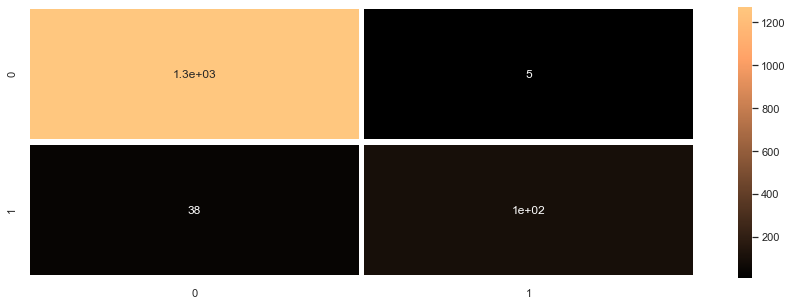

In [412]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="copper" ,linewidths=5, linecolor='white')

In [ ]:
                                    Macro Recall Percision: RANDOM FOREST

In [387]:
pd.DataFrame(classification_report(y_test,RForest_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.983809,0.997654,0.990683,1279.000000
1,0.975410,0.850000,0.908397,140.000000
accuracy,0.983087,0.983087,0.983087,0.983087
macro avg,0.979609,0.923827,0.949540,1419.000000
weighted avg,0.982980,0.983087,0.982565,1419.000000


# ADABoost : Adaptive Boosting

In [439]:
#importing libraries

from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [440]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate= 0.01,random_state = 123)
ADAbt = abc.fit(X_train, y_train)

In [441]:
#checking the ADABoost classifier model score

score = ADAbt.score(X_test,y_test)
print('ADABoost classifier score: %.2f' % score)
percentage = score * 100
print('The accuracy of the ADABoost model is: ',percentage.round(2),"%")

ADABoost classifier score: 0.90
The accuracy of the ADABoost model is:  90.13 %


In [ ]:
                                    ROC AND AUC Score: ADABoost (Adaptive Boosting)

In [442]:
y_pred = ADAbt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [443]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for Adaptive Boosting Model is: ",R_A_score, "%")

The ROC and AUC score for Adaptive Boosting Model is:  50.0 %


In [392]:
ADAbt_CV = abc
print(cross_val_score(ADAbt_CV, X, y, cv = 5, scoring= 'accuracy'))

[0.91437632 0.91437632 0.91331924 0.91331924 0.91428571]


In [394]:
print('The accuracy of the ADABoost Cross Validation: ',
      cross_val_score(ADAbt_CV,X,y,cv = 5,scoring= 'accuracy').mean().round(2)*100,"%")

The accuracy of the ADABoost Cross Validation:  91.0 %


In [ ]:
                                              Confusion Matrix : ADABoost

In [395]:
ADABt_predictions = abc.predict(X_test)
cm = confusion_matrix(y_test,ADABt_predictions)
print('Confusion Matrix: ADABoost\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct prediction: ",np.diag(cm).sum())

Confusion Matrix: ADABoost
 [[1279    0]
 [ 140    0]]
The diagonal elements are:  [1279    0]
Number of correct prediction:  1279


<AxesSubplot:>

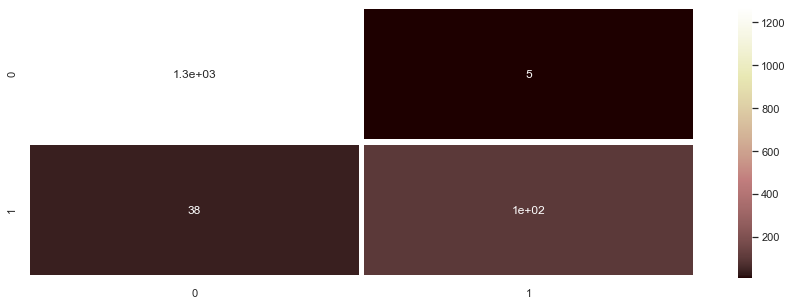

In [413]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="pink" ,linewidths=5, linecolor='white')

In [ ]:
                                        Macro Recall Percision:ADABoost

In [397]:
pd.DataFrame(classification_report(y_test,ADABt_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.901339,1.000000,0.948110,1279.000000
1,0.000000,0.000000,0.000000,140.000000
accuracy,0.901339,0.901339,0.901339,0.901339
macro avg,0.450669,0.500000,0.474055,1419.000000
weighted avg,0.812412,0.901339,0.854568,1419.000000


# SVM (Support Vector Machine)

In [398]:
#importing libraries for SVM

from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=3,tol=0.01,random_state = 54321)
svclassifier.fit(X_train, y_train)

SVC(random_state=54321, tol=0.01)

In [400]:
#checking the SVM model score

score = svclassifier.score(X_test,y_test)
print('SVM model score: %.2f' % score)
percentage = score * 100
print('The accuracy of the SVM model is: ',percentage.round(2),"%")

SVM model score: 0.97
The accuracy of the SVM model is:  96.97 %


In [ ]:
                                    ROC AND AUC Score: SVM (Support Vector Machine)

In [444]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [445]:
R_A_score = (roc_auc_score(y_test,y_pred)*100).round(3)
print("The ROC and AUC score for SVM Model is: ",R_A_score, "%")

The ROC and AUC score for SVM Model is:  86.233 %


In [401]:
SVM_CV = svclassifier
print(cross_val_score(SVM_CV, X, y, cv = 10, scoring= 'accuracy'))

[0.92600423 0.92389006 0.92600423 0.91754757 0.91331924 0.91331924
 0.91966173 0.91754757 0.91120507 0.90889831]


In [402]:
print('The accuracy of the SVM Cross Validation: ',
      cross_val_score(SVM_CV,X,y,cv = 10,scoring= 'accuracy').mean().round(2)*100,"%")

The accuracy of the SVM Cross Validation:  92.0 %


In [403]:
SVM_predictions = svclassifier.predict(X_test)
cm = confusion_matrix(y_test,SVM_predictions)
print('Confusion Matrix: SVM\n',cm)
print("The diagonal elements are: ",np.diag(cm))
print("Number of correct predictions: ",np.diag(cm).sum())

Confusion Matrix: SVM
 [[1274    5]
 [  38  102]]
The diagonal elements are:  [1274  102]
Number of correct predictions:  1376


<AxesSubplot:>

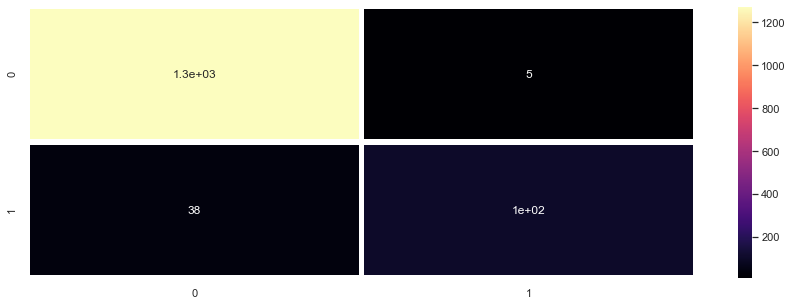

In [414]:
plt.figure(figsize= (15,5))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="magma" ,linewidths=5, linecolor='white')

In [409]:
pd.DataFrame(classification_report(y_test,SVM_predictions,output_dict = True)).T

,precision,recall,f1-score,support
0,0.971037,0.996091,0.983404,1279.000000
1,0.953271,0.728571,0.825911,140.000000
accuracy,0.969697,0.969697,0.969697,0.969697
macro avg,0.962154,0.862331,0.904658,1419.000000
weighted avg,0.969284,0.969697,0.967866,1419.000000
